# Statistics in Python

In this workbook we will be investigating different statistical techniques that we can use to understand our data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Warmup exercise

The iris dataset contains information on three different species of iris that we can use to practice statistical calculations.

In [2]:
# The iris dataset is stored within a library called sklearn
from sklearn import datasets

# The dataset is stored as a dictionary
iris= datasets.load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# To turn it into a dataframe we need to extract the data and column names from the dictionary
# Typically you won't need to do this as read_csv() and read_excel() both automatically create a dataframe for you
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# We can also add another column which tells us which species of iris each flower is
iris_df['species'] = iris['target']

# However, this is returned as a 0, 1 or 2. We can use .map() to insert the species names
iris_df['species'] = iris_df['species'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Using `pandas`'s statistical functions, answer the questions below.

In [4]:
# 1: Calculate the mean sepal width of all flowers in this dataset

#A: 

Click here for the solution

<p style=color:white>
iris_df['sepal width (cm)'].max()
</p>

In [5]:
# 2: Caclulate the median petal length of all flowers in this dataset

#A:

Click here for the solution

<p style=color:white>
iris_df['petal length (cm)'].median()
</p>

In [6]:
#3: Calculate the range of sepal lengths of all flowers in this dataset

#A:

Click here for the solution

<p style=color:white>
iris_df['sepal length (cm)'].max() - iris_df['sepal length (cm)'].min()
</p>

In [7]:
#4: Calculate the median petal width for each species of iris

#A:

Click here for the solution

<p style=color:white>
iris_df.groupby('species').median()[['petal width (cm)']]
</p>

In [8]:
#5: Calculate the mean petal width for each species of iris

#A:

Click here for the solution

<p style=color:white>
iris_df.groupby('species').mean()[['petal width (cm)']]
</p>

## Standard deviation

Standard deviation is a measure of how spread out numbers are in a dataset. The lower the value, the more closely packed the valus are. You can define the standard deviation as **how far away is each value in a dataset away from the mean?**

This is an important step in our EDA as it shows how spread out our data is. Variables with small standard deviations will be much easier to predict, whereas larger standard deviations imply the data is scattered around and will be much harder to model. Finding the standard deviation will give us early insights into how easy it will be to build an accurate model.

You can manually calculate the standard deviation by using these steps:

<ol>
    <li> Calculate the mean of the dataset </li>
    <li> For each value, subtract the mean and square the result (the squared difference) </li>
    <li> Calculate the mean of the squared differences </li>
    <li> Square root your answer </li>
</ol>

Why do you think it is important to square the difference between the mean and values?

In [9]:
#A:

Click here for the solution

<p style=color:white> As some of the values will be lower than the mean, the difference will be negative. When finding the average of the differences, the positive and negative values will cancel out. By squaring the differences we remove this problem.</p>

The figure below shows the spread of sepal lengths (cm) for all flowers in the dataset. The red line shows the mean sepal length. he spread of points around this line is a visually representation of standard deviation.

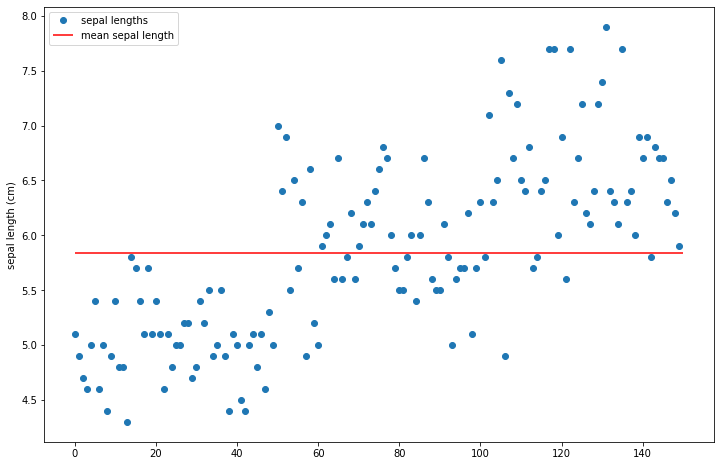

In [10]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(iris_df.index, 
        iris_df['sepal length (cm)'],
        'o',
        label='sepal lengths',
        )

ax.hlines(y=iris_df['sepal length (cm)'].mean(),
          xmin=0,
          xmax=150,
          colors='r',
          label='mean sepal length',
          )

ax.set_ylabel('sepal length (cm)')
ax.legend()

plt.show()

To calculate the standard deviation, we can simply add `.std()` to the series:

In [11]:
iris_df['sepal length (cm)'].std()

0.8280661279778629

On average, the sepal lengths of the iris' in this dataset are on average 0.828cm away from the mean.

## Error

In the next module we will be learning about predictive modelling and with that comes the concept of error. In other words, how far off are your predictions? 

It is essential you work this out as it will determine how reliable your model is. Although we aren't look at predictive modelling now, we can look at how to measure and talk about error.

But how do you verify a prediction? 

What we do is build a model using data we know. For example, if I want to build a model predicting petal lengths of an iris using its sepal length then I need to use data that contains both pieces of information. The model will then make predictions which we can compare to the actual information to find out how accurate it is.

Let's know take a look at a few methods for evaluating how accurate our models are.

### Root Mean Squared Error (RMSE)

The first method for calculating error is the root mean squared error. In this method, we calculate the squared difference between every predicition and the actual value, and then average the results. However, as we squared the differences we need to square root our answer.

This method returns the average distance between the predictions and the real value.

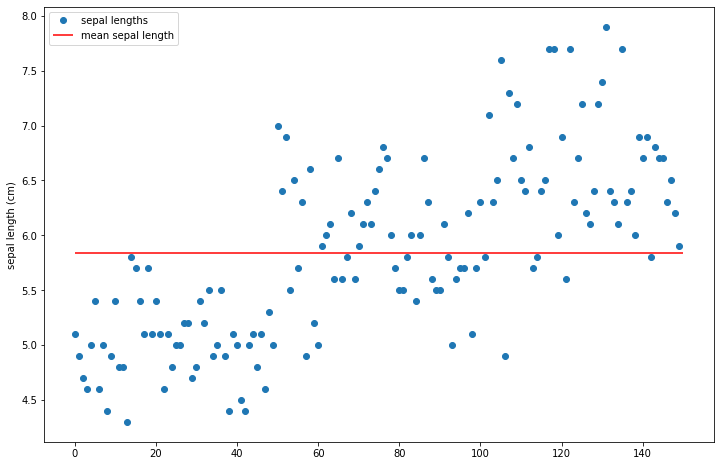

In [12]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(iris_df.index,
        iris_df['sepal length (cm)'],
        'o',
        label='sepal lengths',
        )

ax.hlines(y=iris_df['sepal length (cm)'].mean(),
          xmin=0,
          xmax=150,
          colors='r',
          label='mean sepal length',
          )

ax.set_ylabel('sepal length (cm)')
ax.legend()

plt.show()

Let's consider the previous example of sepal lengths. Let's say that we predicted each plant had a sepal length equal to the mean value. 

In [13]:
mean_sepal_length = iris_df['sepal length (cm)'].mean()
print(mean_sepal_length)

5.843333333333335


To calculate the RMSE we would find the squared difference between the mean and actual value for each plant, and then take the square root of the average of the results.


To calculate RMSE manually:

In [14]:
square_diffs = []

for sepal in iris_df['sepal length (cm)']:
    value = (sepal - mean_sepal_length) ** 2
    square_diffs.append(value)
    
rmse = np.sqrt(np.mean(square_diffs))
print(rmse)

0.8253012917851409


We can do this much more easily using built-in functions:

In [15]:
from sklearn.metrics import mean_squared_error

actual = iris_df['sepal length (cm)']
preds = [mean_sepal_length for i in range(len(iris_df))]

rmse = np.sqrt(mean_squared_error(actual, preds))
print(rmse)

0.8253012917851409


You may notice this is the same result as the standard deviation. If you are using the mean as your predictor then RMSE is the same as standard deviation.

### Mean Absolute Error (MAE)

The problem with finding the difference between a prediction and an actual value is that some calculations will return negative answers, while some will be positive. When averaging, you will then find these cancel each other out. RMSE combats this by squaring the difference, but this isn't the only method. You could take the absolute difference.

An absolute value is when you only take the positive result. For example, 10-4 = 6 which is already positive. But 4-10 = -6 which is negative, so the absolute of this (represented by |4-10|) would be 6.

Calculating the MAE manually:

In [16]:
absolute_diffs = []

for sepal in iris_df['sepal length (cm)']:
    value = np.abs(sepal - mean_sepal_length)
    absolute_diffs.append(value)
    
mae = np.mean(absolute_diffs)
print(mae)

0.6875555555555557


Using functions:

In [17]:
from sklearn.metrics import mean_absolute_error

actual= iris_df['sepal length (cm)']
preds= [mean_sepal_length for i in range(len(iris_df))]

mae = mean_absolute_error(actual, preds)
print(mae)

0.6875555555555557


The mean absolute error in this case is similar to the RMSE, but this might not always be true. 

Whenever you are making a prediction it is a good idea to calculate both the RMSE and MAE. The RMSE is more sensitive to outliers, so MAE can give you a better idea of the error when the data is more spread out. You should always calculate both and compare them, if they are similar then you can ignore the effect outliers have.

## Distribution

When exploring our datasets it is important to consider distribution. Whenever we take a sample of data it will form a distribution, which describes how the data groups together. The most famous distribution is called the Normal (or Gaussian) and looks like a bell curve. 

Knowing the distribution of data allows us to perform statistical tests to calculate the likilihood of something happening. For example, many tests and models assume the data is normally distributed, so it is important to check if this is the case as part of our EDA. Data that is skewed can effect the performance of a model by over-prioritising a particular part of the data.

The simplest way to view distribution is to plot it. In the code block below there is a demonstration of three common types of distribution:

* **Positive skew:** the peak is to the left where the mean is greater than the median
* **Normal or no skew:** the peak is in the centre where mean and the median (and mode) are equal
* **Negative skew:** the peak is to the right where the mean is less than the median

We can observe distribution with either boxplots or histograms as both plot the data on a scale.

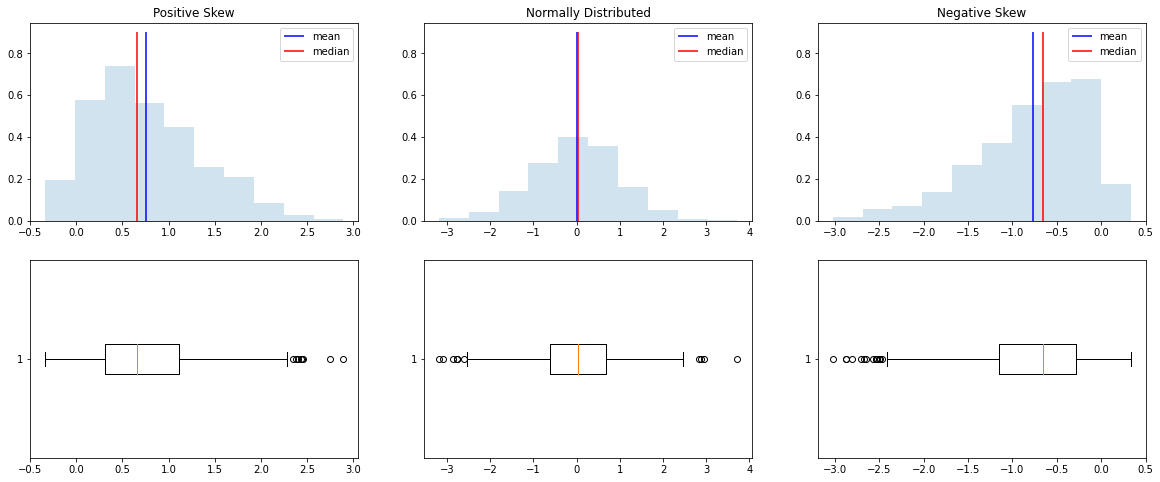

In [18]:
from scipy.stats import skewnorm
import statistics

fig, ax = plt.subplots(2, 3, figsize=(20, 8))

# skewnorm will create a skewed normal distribution, a positive number creates a positive skew and the opposite for negative
rp = skewnorm.rvs(6, size=1000)
ax[0,0].hist(rp, density=True, histtype='stepfilled', alpha=0.2)
ax[0,0].vlines(x=rp.mean(), ymin=0, ymax=0.9, color='b', label='mean')
ax[0,0].vlines(x=statistics.median(rp), ymin=0, ymax=0.9, color='r', label='median')
ax[0,0].set_title('Positive Skew')
ax[0,0].legend()

ax[1,0].boxplot(rp,vert=False)

rg = skewnorm.rvs(0, size=1000)
ax[0,1].hist(rg, density=True, histtype='stepfilled', alpha=0.2)
ax[0,1].vlines(x=rg.mean(), ymin=0, ymax=0.9, color='b', label='mean')
ax[0,1].vlines(x=statistics.median(rg), ymin=0, ymax=0.9, color='r', label='median')
ax[0,1].legend()
ax[0,1].set_title('Normally Distributed')

ax[1,1].boxplot(rg,vert=False)

rn = skewnorm.rvs(-6, size=1000)
ax[0,2].hist(rn, density=True, histtype='stepfilled', alpha=0.2)
ax[0,2].vlines(x=rn.mean(), ymin=0, ymax=0.9, color='b', label='mean')
ax[0,2].vlines(x=statistics.median(rn), ymin=0, ymax=0.9, color='r', label='median')
ax[0,2].legend()
ax[0,2].set_title('Negative Skew')

ax[1,2].boxplot(rn,vert=False)

plt.show()

With boxplots the skew is determined by which quartile the median is closer to. If the median is closer to the lower quartile it is positively skewed, while if it is closer to the upp quartile it is negatively skewed. If it is in the middle there is no skew.

Let's have a look at the distribution of the sepal lengths from our iris dataset using a histogram.

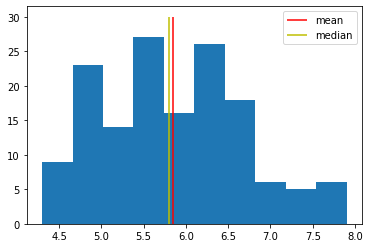

In [19]:
iris_df['sepal length (cm)'].hist(grid=False)
plt.vlines(x=iris_df['sepal length (cm)'].mean(), ymin=0, ymax=30, color='r', label='mean')
plt.vlines(x=iris_df['sepal length (cm)'].median(), ymin=0, ymax=30, color='y', label='median')
plt.legend()
plt.show()

And a boxplot

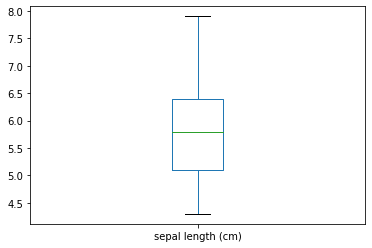

In [20]:
iris_df.boxplot(column='sepal length (cm)', grid=False)
plt.show()

The boxplot and the relatively similar means and medians would suggest this is normally distributed, except the histogram shows three peaks. This suggest we mave several distributions within our data (which is likely given there are three distinct species of iris). The code block below shows the distributions for each species.

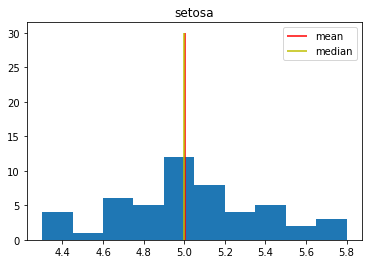

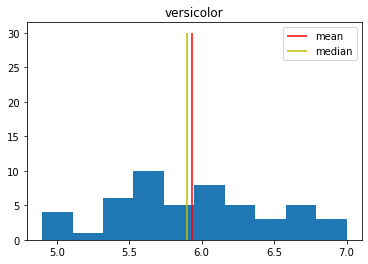

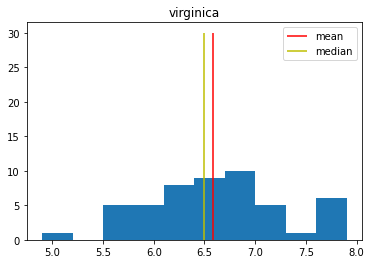

In [21]:
for species in iris_df.species.unique():
    subset = iris_df[iris_df['species'] == species]
    subset['sepal length (cm)'].hist(grid=False)
    plt.vlines(x=subset['sepal length (cm)'].mean(), ymin=0, ymax=30, color='r', label='mean')
    plt.vlines(x=subset['sepal length (cm)'].median(), ymin=0, ymax=30, color='y', label='median')
    plt.title(species)
    plt.legend()
    plt.show()

Another visualisation for checking the distribution of a dataset is called a Quantile-Quantile (QQ) plot. This plot creates a normally distributed set of data the same size as your dataset. Then for both sets of data it ranks them from smallest to largest and plots them on a scatter graph (i.e. smallest against smallest all the way up to largest against largest). 

If the points fall on a diagonal line then it is a good indication the data is normally distributed.

C:\Users\Gilberto Agostinho\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


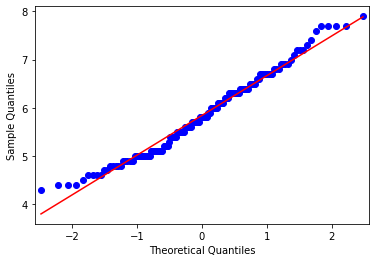

In [22]:
from statsmodels.graphics.gofplots import qqplot

# using line='s': standardized line, the expected order statistics are scaled by the standard deviation 
# of the given sample and have the mean added to them

qqplot(iris_df['sepal length (cm)'], line='s')
plt.show()

## Probability

Probability is the likilihood of something happening. For a given event (something happening), the probability is defined as the number of times that event can occur divided by the total number of outcomes.

For example, on a standard dice there are 6 sides, so the probability of rolling a three would be 1 in 6, or 1/6 (that is, 1 way of getting a three out of 6 options).

In a standard deck of cards, the probability of drawing a queen is 4/52 (which can be reduced to 1/13), since there are four queens in 52 cards, and so on.

But how does this help us with our analysis?

Through examining how likely something is to occur. 

Often we see trends or events happen in our data and we want to examine if this has happened by chance, or because something has affected it. Whenever we want to explore our data this way, we need to examine probabilities.

Imagine someone has just flipped a coin 20 times and observed 15 heads. How likely is it that this coin is biased? 

First, let's look at the probability of getting 15 out of 20 heads. The probability of getting a head is 0.5 (1/2) because there is only 2 options and only 1 is a head. The probability of getting 2 heads in a row is 0.25 (1/4) as there is 4 possible outcomes (HH, HT, TH, TT) with only 1 being 2 heads. Another way of performing this calculation is to consider that 0.5 * 0.5 = 0.25, in other words, to calculate the probability of consecutive events just multiply the probabilities together.

But what do we do with 15 heads out of 20? Is it 15 consecutive heads and then 5 tails? Is it 10 consecutive heads, a couple of tails, 5 heads and some more tails? To do this we need to go back to distributions, in this case the binomial distibution (the binomial distribution is used for data with only 2 outcomes).

The scipy library contains all the functions we need to calculate probabilities with the binomial distribution, including a probability mass function which takes 3 inputs - number of successes, number of trials and probability of success. We can use this to calculate the probability of any outcome. The code below uses the function (line 6) to calculate the probability of observing each possible outcome:

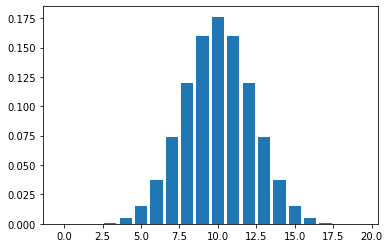

In [23]:
from scipy.stats import binom

probabilities = []
indeces = []

for i in range(0, 20):
    prob = binom.pmf(i, 20, 0.5)
    probabilities.append(prob)
    indeces.append(i)
    
plt.bar(indeces, probabilities)
plt.show()

Clearly the most likely outcome when flipping 20 coins is to get 10 heads, but what about 15 heads? The visualization shows this as being around 1%. We can use the binom function to calculate this exactly:

In [24]:
binom.pmf(15, 20, 0.5)

0.014785766601562497

So the probability of getting 15 heads out of 20 tosses is just under 1.5%. This is very unlikely to happen, but does this mean the coin is biased? 

To determine this we will need to do a hypothesis test.

## Hypothesis Testing

A hypothesis test is an important tool in an analysts toolkit. It allows us to ask the question: **did this event occur by chance?**

When we set up a hypothesis test we need to declare four things:

* **A null hypothesis:** this is the status quo, the thing we are trying to disprove (e.g. the event occurred by chance).
* **An alternate hypothesis:** what we are proposing is happening instead (e.g. the event happened by something we can describe). 
* **If it is a one or two tailed test:** if we say for example that the probability of getting a head is greater or less than 0.5 then it is one-tailed. If you are saying instead that the probability is not equal to 0.5 it is two tailed.
* **A significance level:** when we perform a hypothesis test we will receive what is called a p-value. If this value is lower than our significance level we reject our null hypothesis. Typically this will be 10%, 5% or 1%. 

Note, we never prove or disprove the alternate hypothesis. The aim is that we are either going to reject or fail to reject the null hypothesis based on the evidence we have.

So in our example from before, we are asking if the coin is biased. In other words, the probability of getting a head is not 0.5. So our hypotheses would be:

* **Null hypothesis:** probability of getting a head is 50%
* **Alternate hypothesis:** probability of getting a head is not 50%

And we will test this at the 5% level, meaning if what we observe has a probability less than 5% we would reject the null hypothesis. (This is called a 2-tail test because we are saying the probability is not 0.5. If we were to be more specific and say the probability of getting a head was greater than 0.5, this would be a 1-tail test).

So how do we calculate this p-value? It's not what we calculated before, that was merely the probability of getting 15/20 heads. What we are asking then, is if the coin is fair, what is the probability of observing <i> at least </i> 15 heads?

Fortunately, python can calculate this for us using the binom_test function in the stats package. In this function we enter the number of successes (15), the number of trials (20) and the probability of success (0.5) as well as what type of test (two-sided, greater, less). The function then returns the probability of seeing at least that many observations. If the value is lower than the significance level you stated then you can rject the null hypothesis

Choose a one tailed test if you are specifically testing that the probability is either lower or greater than what has been stated. If you are unsure, or are just testing that the true probability is different to what has been stated then choose a two tailed test.


In [25]:
from scipy.stats import binom_test

binom_test(15, 20, p=0.5, alternative='two-sided')

0.04138946533203125

The value this test has produced can be interpreted as the probability of an unbiased coin producing at least 15 heads. We have found this to be 0.414 or 4.14%. As this is below our significance level of 5%, we can reject our null hypothesis that the coin is unbiased and accept the alternate that it is biased. 

But what has actually happened?

What we have done is calculate a p-value. A p-value is the probability of obtaining a result as least as extreme as what we observed under the conditions of the null hypothesis. If this value is less than 5% we are saying therefore, that what we observed is so unlikely to have happened under the conditions of the null hypothesis, that the null hypothesis must be wrong. In this case, seeing at least 15/20 heads is so unlikely, the coin must be biased.

But this approach leads to another discussion on error (which we will explore in more detail in the next module). The probability of seeing at least 15/20 heads is 4.14%, which means it is possible (although unlikely) that an unbiased coin could return that result. In that case we would have rejected the null hypothesis when we shouldn't have.

This is called a false positive (or a type I error), when we reject a null hypothesis when we shouldn't have. The opposite of this is a false negative (or type II error) when we fail to reject a null hypothesis when we shouldn't have (e.g. a biased coin yields an acceptable number of heads).

The table below shows the four different outcomes from a hypothesis test:

In [26]:
df = pd.DataFrame(
    [['True Negative', 'False Positive'], ['False Negative', 'True Positive']],
    index=['Null Hypothesis Correct', 'Null Hypothesis Incorrect'],
    columns=['Fail to Reject Null', 'Reject Null'],
)

df

,Fail to Reject Null,Reject Null
Null Hypothesis Correct,True Negative,False Positive
Null Hypothesis Incorrect,False Negative,True Positive


The probability of making a Type I error (false positive) is equal to the significance level (in this case 5%). We can reduce the probability of making a Type I error by making the significane level lower (e.g. 1%, so it would be harder to reject the null hypothesis). However, in doing this you are increasing the chance of making a Type II error, where you would have rejected the null but now won't. 

Reducing the chances of making a Type I or Type II error depends on which type you think is more acceptable. For example, you would rather tell someone they have an illness (when they don't - Type I) than tell them they don't have an illness (when they do - Type II). In the second case, those people would not receive treatment they need, while in the first case the mistake would likely soon be picked up.

Deciding on which type of error to minimise is entirely down to the conext of the situation and which one of them is 'worse.' We will think about the ethics of this in the workshop.

Let's do one more example. A programme developer states that only 10% of their applications contain bugs. However, after an audit it was found that 4 out of 12 of their applications contained bugs. Does this mean that the developer is wrong?

Let's set up a hypothesis test where we are investigating if 4/12 applications having bugs is sufficient evidence to say that the developer's bug rate is greater than 10%.

<ul>
    <li> Null hypothesis: the probability of an app having a bug is 0.1 </li>
    <li> Alternate hypothesis: the probability of an app having a bug is greater than 0.1 </li>
</ul>

This is a one-tailed test which we will test at the 5% level.

In [27]:
binom_test(4, 12, p=0.1, alternative='greater')

0.025637470165000006

In this instance, under the assumption that only 10% of apps have bugs, observing 4 out of 12 with bugs has a probability of 2.6% which is less than our significance level of 5%.

We therefore have sufficient evidence to say that we can reject the null hypothesis. In other words, the developer cannot claim to only having bugs 10% of the time. Note, this isn't to say what the actual rate is, only that the developer cannot claim it is 10% because we have evidence to say it is going to be higher.

Whenever we want to examine if something has had a significant effect we need to employ a hypothesis test to give us the evidence we need. 

This is just an introduction to hypothesis testing, we will explore it in more detail in the workshops.

### Practice

In [28]:
# What is the standard deviation of petal widths of all flowers?

#A:

Click here for the solution

<p style=color:white>
iris_df['petal width (cm)'].std()
</p>

In [29]:
# Which species of flower has the largest standard deviation of petal length?

#A:

Click here for the solution

<p style=color:white>
iris_df.groupby('species').std()[['petal length (cm)']].sort_values(by='petal length (cm)', ascending=False)
</p>

In [30]:
# Calculate the mean petal length for all flowers.

#A:

Click here for the solution

<p style=color:white>
mpl = iris_df['petal length (cm)'].mean()
print(mpl)
</p>

In [31]:
# Using this value as a prediction for all petal lengths, calculate the RMSE and MAE.

#A:

Click here for the solution

<p style=color:white>
actual = iris_df['petal length (cm)']
preds = [mpl for i in range(len(iris_df))]
rmse = np.sqrt(mean_squared_error(actual, preds))
mae = mean_absolute_error(actual, preds)
print('RMSE:', rmse)
print('MAE:', mae)
</p>

In [32]:
# Plot and comment on the distribution for petal lengths of all flowers.

#A:

Click here for the solution

<p style=color:white>
plt.hist(iris_df['petal length (cm)'])
plt.show()
# You could argue it is positively skewed, but to get more of an idea should break it down by species
for specie in iris_df.species.unique():
    plt.hist(iris_df[iris_df.species == specie]['petal length (cm)']);    
# For each species you could roughly say that they are each normally distributed
</p>

In [33]:
# A company has claimed that 20% of its hires are from non-university educated backgrounds. 
# A recent survey has shown that out of 60 recent hires, 7 had not been to university. 
# Test at the 5% level if this sufficient evidence to disprove the company's claim.


Click here for the solution

<p style=color:white>
print('one tailed:', binom_test(7, 60, p=0.2, alternative='less'))
print('two tailed:', binom_test(7, 60, p=0.2, alternative='two-sided'))
# In both cases fail to reject the null hypothesis, there is insufficient evidence to reject it    
</p>